# ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ - ΕΡΓΑΣΙΑ 2

### ΕΥΘΥΜΙΟΣ ΓΡΗΓΟΡΑΚΗΣ - ΑΕΜ: 9694
### ΑΝΕΣΤΗΣ ΚΑΪΜΑΚΑΜΙΔΗΣ - ΑΕΜ: 9627

In [2]:
!pip install numpy 
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np 
from matplotlib import pyplot as plt

# ΜΕΡΟΣ Α

#### ΕΡΩΤΗΜΑ 1

2.5025025025025087
-3.103103103103095


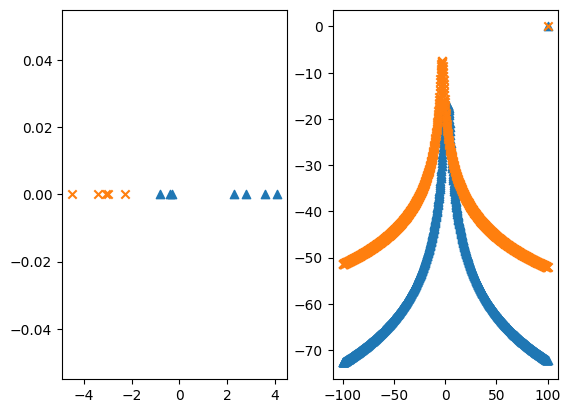

In [55]:
def maxtheta(dataset,linespace):
    max = - np.inf
    
    
    Ltheta = np.zeros(linespace.size)

    for i in range(linespace.size-1):
        tmp_max = 1
        for j in range(dataset.size):
            tmp_max = tmp_max * (1/np.pi) * (1/(1+pow(dataset[j] - linespace[i],2)))
            Ltheta[i] = np.log(tmp_max)
        if tmp_max > max:
            theta = linespace[i]
        max = tmp_max

    return theta, Ltheta

P1 = 7/12
P2 = 5/12

D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

x1 = np.array([[0, 0, 0, 0, 0, 0, 0]])
x2 = np.array([[0, 0, 0, 0, 0]])

points =1000
linespace = np.linspace(-100,100,num=points)

fig = plt.figure()

# axes = plt.axes()
plt.subplot(1, 2, 1)
plt.scatter(D1,x1,marker = '^')
plt.scatter(D2,x2,marker = 'x' )


theta1_hat, Ltheta1 = maxtheta(D1,linespace)
theta2_hat, Ltheta2 =maxtheta(D2,linespace)

plt.subplot(1, 2, 2)
plt.scatter(linespace,Ltheta1,marker = '^')
plt.scatter(linespace,Ltheta2,marker = 'x')

print(theta1_hat)
print(theta2_hat)

plt.show()


#### ΕΡΩΤΗΜΑ 2

In [39]:
class Classifier:
    def fit(data,theta):
        max = - np.inf

        for i in range(theta.size):
            tmp_max = 1
            for j in range(data.size):
                tmp_max = tmp_max * (1/np.pi) * (1/(1+pow(data[j] - theta[i],2)))
            if tmp_max > max:
                theta_hat = theta[i]
            max = tmp_max

        return theta_hat

    def predict(data,P1,P2):
        gx = np.zeros(data.size)

        for i in range(data.size):
            gx[i] = np.log((1/np.pi) * (1/(1+pow(data[i] - theta1_hat,2)))) - np.log((1/np.pi) * (1/(1+pow(data[i] - theta2_hat,2)))) + np.log(P1) - np.log(P2)

        return gx 

classes = Classifier

theta1_hat = classes.fit(D1,linespace)
gx1 = classes.predict(D1,P1,P2)
print(gx1)

theta2_hat = classes.fit(D2,linespace)
gx2 = classes.predict(D2,P1,P2)
print(gx2)

D = np.append(D1,D2)
gx = classes.predict(D,P1,P2)

Dclass = np.zeros(D.size)

for i in range(D.size):
    if gx[i] > -1:
        Dclass[i] = 1
    else:
        Dclass[i] = 2

print(Dclass)
        

[ 3.83091672  0.21022776 -0.29938476  3.70391091  0.33685241  3.37312431
  3.03707587]
[-2.4939985  -3.15810244 -3.14130718 -3.09585369 -2.34652103]
[1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.]


# ΜΕΡΟΣ Β

[9.07649096e-258 2.15477866e-239 1.31245785e-221 1.76251387e-204
 4.31507223e-188 1.50681406e-172 5.40050316e-158 1.25020385e-144
 9.40709703e-133 8.80231435e-123 1.33649491e-114 1.25387834e-106
 7.62431027e-099 1.89051195e-091 2.04710330e-083 1.37686228e-073
 7.35321550e-062 1.21989901e-048 3.15602855e-034 8.00489552e-019]
2.5263678849015602e-52
[5.71796535e-208 1.50782190e-189 1.01870511e-171 1.51257672e-154
 4.07194374e-138 1.55059412e-122 5.99116258e-108 1.47317474e-094
 1.15641745e-082 1.10598450e-072 1.67926593e-064 1.54139665e-056
 8.98408794e-049 2.09727948e-041 2.10658131e-033 1.29928433e-023
 6.31047662e-012 9.46862681e+001 2.20845373e+016 5.04288666e+031]
[5.48483376e-137 4.22568021e-126 6.07550736e-116 1.16727429e-106
 1.84087117e-098 1.14016859e-091 1.22384067e-086 4.36756414e-083
 1.59719887e-079 3.19483109e-074 3.41977268e-067 7.37984004e-059
 1.63893336e-049 2.41640536e-039 1.75067402e-028 5.01525823e-017
 4.82280371e-005 1.36986331e+008 1.03696967e+021 1.92216110e+034]

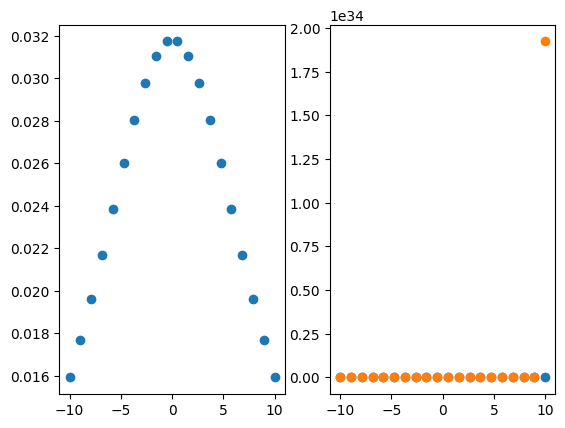

In [85]:
def integral(data,linespace,ptheta):
    pDth = np.zeros(linespace.size)
    for i in range(linespace.size):
        pDth[i]= 1
        for j in range(data.size):
            pDth = pDth * (1/np.pi) * (1/(1+pow(data[j] - linespace[i],2)))
    pDth_pth = np.zeros(linespace.size)
    for i in range(linespace.size):
        pDth_pth[i] = pDth[i] * ptheta[i]

    step = (linespace[-1] - linespace[0])/linespace.size
    sum = 0

    for i in range(linespace.size - 1):
        sum = sum + ((pDth_pth[i] * pDth_pth[i + 1]))/step
    
    # print(sum)
    # print(pDth_pth)
    # fig = plt.figure()
    # plt.scatter(linespace,np.log(pDth_pth))
    # plt.show()

    return sum, pDth_pth

points = 20
theta_linespace = np.linspace(-10,10,num = points)
# print(theta_linespace)

ptheta = np.zeros(points)

for i in range(points):
    ptheta[i] = (1/(10*np.pi)) * (1/(1+pow(theta_linespace[i]/10,2)))


integral1, pDth_pth1 = integral(D1,theta_linespace,ptheta)
integral2, pDth_pth2= integral(D2,theta_linespace,ptheta)
print(pDth_pth1)
print(integral1)

pth_D1 = np.zeros(points)
pth_D2 = np.zeros(points)

for i in range(points):
    pth_D1[i] = (pDth_pth1[i] * ptheta[i])/integral1
    pth_D2[i] = (pDth_pth2[i] * ptheta[i])/integral1

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.scatter(theta_linespace,ptheta)

print(pth_D1)
print(pth_D2)
plt.subplot(1, 2, 2)
plt.scatter(theta_linespace,pth_D1)
plt.scatter(theta_linespace,pth_D2)
plt.show()
